# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

# 3.1 Imports<a id='3.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm # provide classes and functions for the estimation of many different statistical models,
#as well as for conducting statistical tests, and statistical data exploration 
from sklearn import linear_model, preprocessing #  different functions for performing machine learning with linear models. .

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from statsmodels.graphics.api import abline_plot # Plot a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # The r2_score function computes the coefficient of determination, usually denoted as R²
#The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared
from sklearn.model_selection import train_test_split #  Split arrays or matrices into random train and test subsets.


## 3.2 Load The Data<a id='3.4_Load_The_Data'></a>

In [3]:
airbnb_data = pd.read_csv('airbnb_data_clean.csv')

In [4]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28434 entries, 0 to 28433
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 28434 non-null  int64  
 1   latitude                   28434 non-null  float64
 2   longitude                  28434 non-null  float64
 3   property_type              28434 non-null  object 
 4   room_type                  28434 non-null  object 
 5   beds                       28009 non-null  float64
 6   accommodates               28434 non-null  int64  
 7   price                      28160 non-null  float64
 8   number_of_reviews          28434 non-null  int64  
 9   review_scores_rating       28434 non-null  float64
 10  host_is_superhost          28434 non-null  bool   
 11  host_verifications         28434 non-null  object 
 12  host_picture_url           28431 non-null  object 
 13  host_listings_count        28431 non-null  flo

In [5]:
airbnb_data.head()

,Unnamed: 0,latitude,longitude,property_type,room_type,beds,accommodates,price,number_of_reviews,review_scores_rating,host_is_superhost,host_verifications,host_picture_url,host_listings_count,host_total_listings_count
0,0,40.68457,-73.91181,Private room in rental unit,Private room,1.0,1,65.0,5,4.80,False,"['email', 'phone']",https://a0.muscache.com/im/pictures/user/5c087...,1.0,2.0
1,3,40.68180,-73.93121,Entire rental unit,Entire home/apt,1.0,2,70.0,2,5.00,False,"['email', 'phone', 'work_email']",https://a0.muscache.com/im/users/4298654/profi...,1.0,2.0
2,4,40.68209,-73.94279,Entire rental unit,Entire home/apt,2.0,4,170.0,88,4.98,True,"['email', 'phone']",https://a0.muscache.com/im/pictures/user/41ec9...,1.0,1.0
3,5,40.72625,-73.98691,Private room in condo,Private room,1.0,1,140.0,61,4.43,False,"['email', 'phone']",https://a0.muscache.com/im/pictures/user/a7674...,2.0,9.0
4,6,40.72813,-73.98801,Private room in condo,Private room,1.0,1,125.0,41,4.29,False,"['email', 'phone']",https://a0.muscache.com/im/pictures/user/a7674...,2.0,9.0


In [6]:
airbnb_data.shape

(28434, 15)

In [7]:
#drop some of the superfLuous columns
airbnb_data.drop(['host_verifications'], axis=1, inplace=True)
airbnb_data.drop(['host_picture_url'], axis=1, inplace=True)

In [8]:
#remove Nan price and beds
airbnb_data= airbnb_data[airbnb_data['beds'].notnull()]
airbnb_data= airbnb_data[airbnb_data['price'].notnull()]

In [9]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27743 entries, 0 to 28433
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 27743 non-null  int64  
 1   latitude                   27743 non-null  float64
 2   longitude                  27743 non-null  float64
 3   property_type              27743 non-null  object 
 4   room_type                  27743 non-null  object 
 5   beds                       27743 non-null  float64
 6   accommodates               27743 non-null  int64  
 7   price                      27743 non-null  float64
 8   number_of_reviews          27743 non-null  int64  
 9   review_scores_rating       27743 non-null  float64
 10  host_is_superhost          27743 non-null  bool   
 11  host_listings_count        27740 non-null  float64
 12  host_total_listings_count  27740 non-null  float64
dtypes: bool(1), float64(7), int64(3), object(2)
me

## 3.3 Explore The Data<a id='3.5_Explore_The_Data'></a>

<Axes: xlabel='accommodates', ylabel='price'>

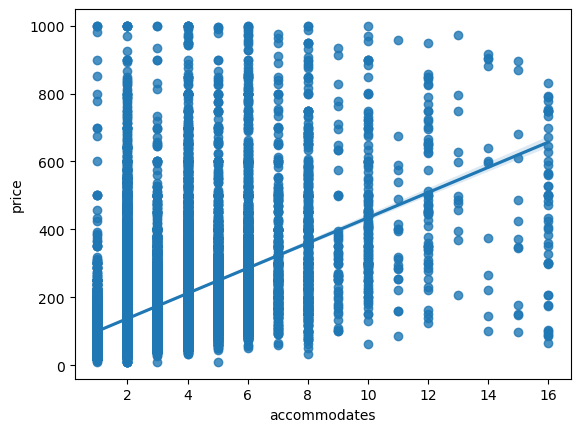

In [27]:
sns.regplot(x='accommodates', y ='price', data=airbnb_data)

In [28]:
X = airbnb_data[['accommodates']]
Y = airbnb_data['price']
lm=linear_model.LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.24834905598389323

The above R-Squared coefficient is basically a measure of how successfully our model predicts the variations in the data away from the mean: which is currently at 25%

In [13]:
#gives multicorrelational
airbnb_data.corr()

C:\Users\deept\AppData\Local\Temp\ipykernel_5708\2277941762.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb_data.corr()


,Unnamed: 0,latitude,longitude,beds,accommodates,price,number_of_reviews,review_scores_rating,host_is_superhost,host_listings_count,host_total_listings_count
Unnamed: 0,1.000000,0.006107,-0.012849,-0.007711,-0.000336,0.003628,-0.035463,-0.024440,0.007550,0.178031,0.185129
latitude,0.006107,1.000000,0.063780,-0.077387,-0.053284,0.022986,-0.042747,-0.046900,-0.075649,0.040959,0.044249
longitude,-0.012849,0.063780,1.000000,0.059668,0.026932,-0.220702,0.033497,0.009824,0.108035,-0.048376,-0.056287
beds,-0.007711,-0.077387,0.059668,1.000000,0.765998,0.422560,0.075307,0.027491,0.091260,-0.028848,-0.029296
accommodates,-0.000336,-0.053284,0.026932,0.765998,1.000000,0.498346,0.046961,0.019324,0.047994,-0.011768,-0.010639
price,0.003628,0.022986,-0.220702,0.422560,0.498346,1.000000,0.023146,0.060653,0.060462,0.065496,0.082219
number_of_reviews,-0.035463,-0.042747,0.033497,0.075307,0.046961,0.023146,1.000000,0.097144,0.259342,-0.055596,-0.054306
review_scores_rating,-0.024440,-0.046900,0.009824,0.027491,0.019324,0.060653,0.097144,1.000000,0.185891,-0.038360,-0.040773
host_is_superhost,0.007550,-0.075649,0.108035,0.091260,0.047994,0.060462,0.259342,0.185891,1.000000,-0.055569,-0.057320
host_listings_count,0.178031,0.040959,-0.048376,-0.028848,-0.011768,0.065496,-0.055596,-0.038360,-0.055569,1.000000,0.951035


In [21]:
#use the Pandas method corr() to find the feature other than price that is most correlated with price
airbnb_data.corr()['price'].sort_values()

C:\Users\deept\AppData\Local\Temp\ipykernel_5708\3254501915.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb_data.corr()['price'].sort_values()


longitude                   -0.220702
Unnamed: 0                   0.003628
latitude                     0.022986
number_of_reviews            0.023146
host_is_superhost            0.060462
review_scores_rating         0.060653
host_listings_count          0.065496
host_total_listings_count    0.082219
beds                         0.422560
accommodates                 0.498346
price                        1.000000
Name: price, dtype: float64

As we can see from the corr function that the pricing is related the sqft_living, number of bathrooms, view, and number of bedroom

C:\Users\deept\AppData\Local\Temp\ipykernel_5708\3667004845.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb_data.corr());


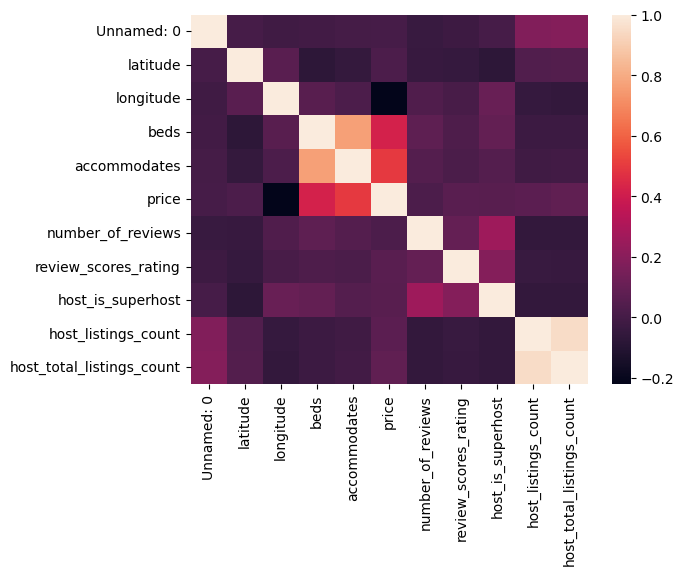

In [31]:
sns.heatmap(airbnb_data.corr());

In [22]:
airbnb_data.describe()

,Unnamed: 0,latitude,longitude,beds,accommodates,price,number_of_reviews,review_scores_rating,host_listings_count,host_total_listings_count
count,27743.000000,27743.000000,27743.000000,27743.000000,27743.000000,27743.000000,27743.000000,27743.000000,27740.000000,27740.000000
mean,18520.816458,40.727287,-73.942817,1.641063,2.861515,169.535198,34.855279,4.627475,35.313230,54.128983
std,10633.749373,0.058321,0.057102,1.080558,1.844291,137.243315,63.083764,0.740161,286.332942,416.281424
min,0.000000,40.500314,-74.249840,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000
25%,9320.500000,40.686375,-73.981030,1.000000,2.000000,80.000000,3.000000,4.600000,1.000000,1.000000
50%,18778.000000,40.721780,-73.951700,1.000000,2.000000,130.000000,11.000000,4.830000,2.000000,3.000000
75%,27394.500000,40.762703,-73.922988,2.000000,4.000000,203.000000,38.000000,5.000000,4.000000,7.000000
max,38791.000000,40.911147,-73.713650,21.000000,16.000000,999.000000,1843.000000,5.000000,4559.000000,8820.000000


<Axes: >

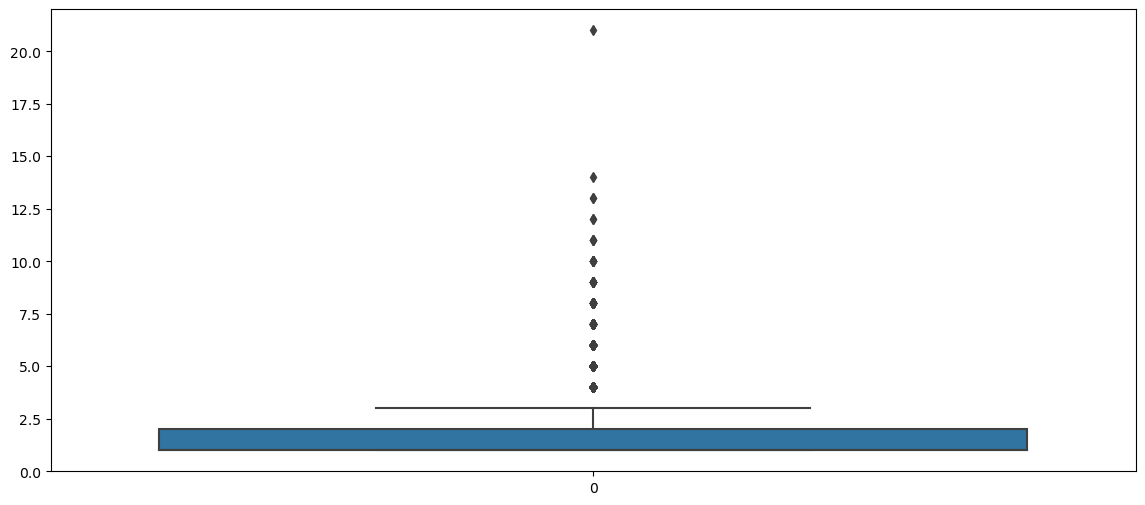

In [29]:
# Looking at the summary stats of bedrooms and also a boxplot
# we can see there is one entry that has 15 bedrooms
plt.figure(figsize=(14,6))
sns.boxplot(airbnb_data.beds)

In [30]:
# Let's look at the entries with more bedrooms just to check
# these entries - might be an error in entry
airbnb_data[airbnb_data.beds > 15]

,Unnamed: 0,latitude,longitude,property_type,room_type,beds,accommodates,price,number_of_reviews,review_scores_rating,host_is_superhost,host_listings_count,host_total_listings_count
3449,4534,40.85534,-73.89733,Private room in guesthouse,Private room,21.0,16,66.0,5,3.75,False,1.0,1.0


In [34]:
#when we look at the outlier with 21 bedrooms we see that it is the only $66
airbnb_data = airbnb_data[airbnb_data.beds <= 15]

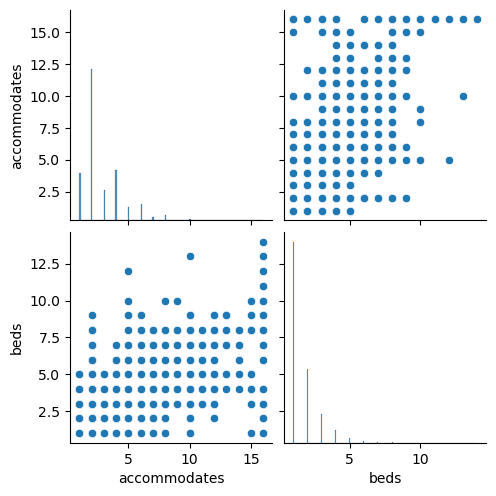

In [35]:
#Multivariate analysis is used for understanding the interactions between each fields in the dataset more than two. In this method, we will be using pairplot

features =["accommodates", "beds"] 
sns.pairplot(airbnb_data[features])
plt.show()

In [36]:
#Applying Regression Equation on the features
Y = airbnb_data['price']
X = airbnb_data[features]
lm.fit(X, Y)

LinearRegression()

In [37]:
lm.score(X, Y)

0.2534891666156115

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4162
number of training samples: 23580
